In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy import stats as st

In [4]:
data = pd.read_csv(r'C:\Users\YurcheNa\OneDrive - Avon\Documents\Нетология_2020\HW\pyda-16-hw-1\HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

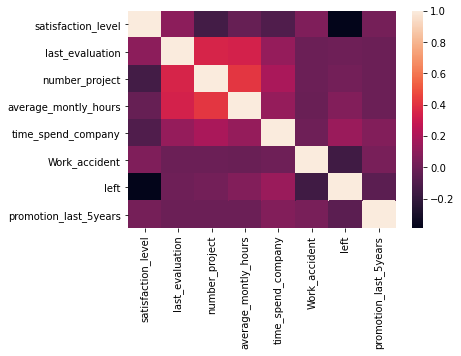

In [8]:
sns.heatmap(data.corr())

Наиболее скоррелированные величины - average_monthly_hours & number_projects (много проектов, много рабочих часов)

Наименее скоррелированные left & satisfaction level (решение покинуть компанию и уровень удовлетворенности)

In [9]:
data.groupby(['department']).count()
# сколько сотрудников в каждом департаменте

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [10]:
salary = data['salary']

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

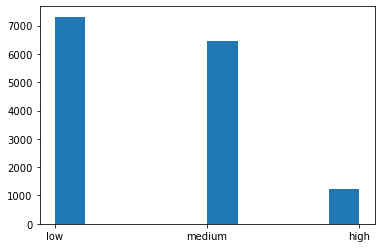

In [11]:
plt.hist(salary)
#распределение сотрудников по зарплатам

In [19]:
salary_IT = data[(data['department'] == 'IT')].salary
salary_RandD = data[(data['department'] == 'RandD')].salary
salary_accounting = data[(data['department'] == 'accounting')].salary
salary_hr = data[(data['department'] == 'hr')].salary
salary_management = data[(data['department'] == 'management')].salary
salary_marketing = data[(data['department'] == 'marketing')].salary
salary_product_mng = data[(data['department'] == 'product_mng')].salary
salary_sales = data[(data['department'] == 'sales')].salary
salary_support = data[(data['department'] == 'support')].salary
salary_technical = data[(data['department'] == 'technical')].salary

(array([535.,   0.,   0.,   0.,   0., 609.,   0.,   0.,   0.,  83.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

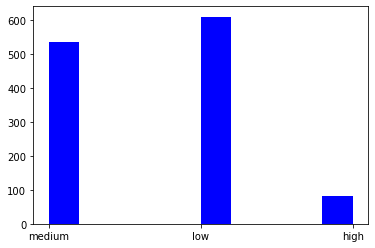

In [15]:
plt.hist(salary_IT, color = 'blue')


(array([372.,   0.,   0.,   0.,   0., 364.,   0.,   0.,   0.,  51.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

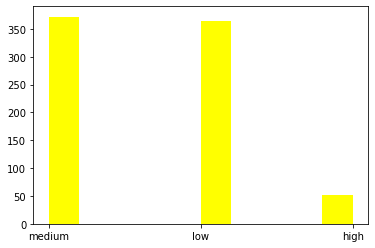

In [16]:
plt.hist(salary_RandD, color = 'yellow')

(array([358.,   0.,   0.,   0.,   0., 335.,   0.,   0.,   0.,  74.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

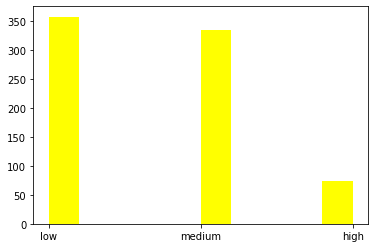

In [17]:
plt.hist(salary_accounting, color = 'yellow')

(array([335.,   0.,   0.,   0.,   0., 359.,   0.,   0.,   0.,  45.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

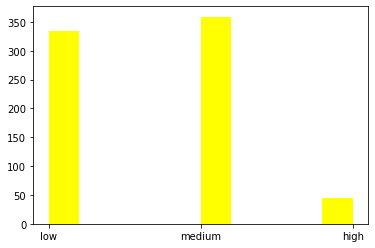

In [20]:
plt.hist(salary_hr, color = 'yellow')

(array([225.,   0.,   0.,   0.,   0., 180.,   0.,   0.,   0., 225.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

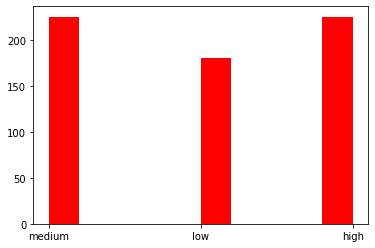

In [21]:
plt.hist(salary_management, color = 'red')

(array([376.,   0.,   0.,   0.,   0., 402.,   0.,   0.,   0.,  80.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

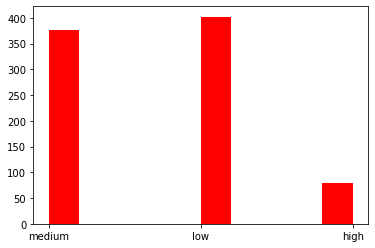

In [22]:
 plt.hist(salary_marketing, color = 'red') 

(array([383.,   0.,   0.,   0.,   0.,  68.,   0.,   0.,   0., 451.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

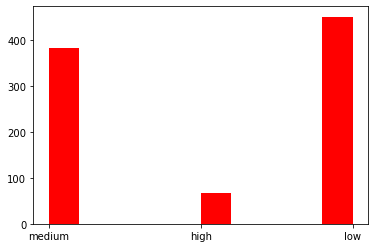

In [23]:
 plt.hist(salary_product_mng, color = 'red') 

(array([2099.,    0.,    0.,    0.,    0., 1772.,    0.,    0.,    0.,
         269.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

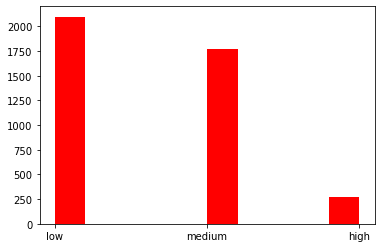

In [24]:
 plt.hist(salary_sales, color = 'red') 

(array([1146.,    0.,    0.,    0.,    0.,  942.,    0.,    0.,    0.,
         141.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

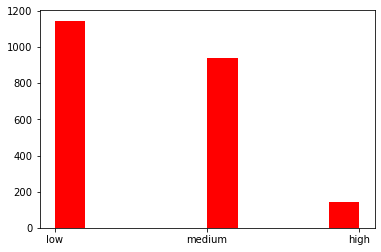

In [25]:
 plt.hist(salary_support, color = 'red') 

(array([1372.,    0.,    0.,    0.,    0., 1147.,    0.,    0.,    0.,
         201.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

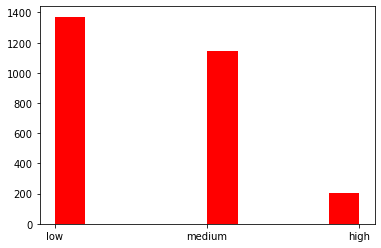

In [26]:
 plt.hist(salary_technical, color = 'red') 

In [39]:
#Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

In [41]:
salary_low = data[(data['salary'] == 'low')].average_montly_hours
salary_high = data[(data['salary'] == 'high')].average_montly_hours

In [44]:
alpha = 0.05
result = st.ttest_ind(salary_low, salary_high, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу,сотрудники с высоким и низким окладом проводят на работе НЕ одинаковое кол-во времени')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


(array([ 46.,  80., 170., 192., 141., 160., 159., 167., 106.,  16.]),
 array([ 96. , 117.1, 138.2, 159.3, 180.4, 201.5, 222.6, 243.7, 264.8,
        285.9, 307. ]),
 <BarContainer object of 10 artists>)

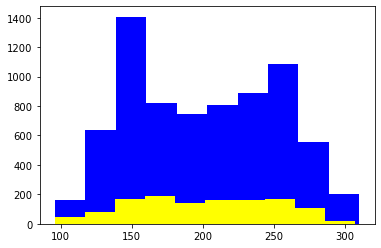

In [45]:
plt.hist (salary_low, color = 'blue')
plt.hist (salary_high, color = 'yellow')

In [46]:
# сотрудники с высокой зарплатой проводят на работе меньше времени

In [ ]:
#Рассчитать для уволившихся и не уволившихся долю сотрудников с повышением за последние 5 лет

In [62]:
left = data['promotion_last_5years'].groupby(data['left']).sum()/data['promotion_last_5years'].groupby(data['left']).count()

left

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

In [ ]:
#доля получивших повышение среди тех, кто уволился, составляет менее 1%. Доля получивших повышение среди работающих - 3%

In [ ]:
#Рассчитать для уволившихся и не уволившихся среднюю степень удовлетворенности

In [65]:
satisfaction = data['satisfaction_level'].groupby(data['left']).mean()
satisfaction

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [ ]:
# Для уволившихся средний уровень удовлетворенности 44%, для работающих - 67%

In [ ]:
#Рассчитать для уволившихся и не уволившихся среднее количество проектов

In [66]:
projects = data['number_project'].groupby(data['left']).mean()
projects

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [ ]:
#Среднее число проектов для уволившихся - 3.9, для работающих - 3.8

In [ ]:
#Разделить данные на тестовую и обучающую выборки. Построить модель LDA, 
#предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
#Оценить качество модели на тестовой выборке

In [68]:

from sklearn.model_selection import train_test_split

In [90]:
data_1 = data.drop(columns = ['salary', 'department'])
data_1 = data_1.dropna()
data_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(data_1, data_1['left'], test_size=0.2)

In [100]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
5960,0.77,0.71,2,242,2,0,0,0
3928,0.70,0.91,5,139,3,1,0,0
906,0.10,0.78,7,286,4,0,1,0
6173,0.63,0.85,3,151,4,1,0,0
8527,0.88,0.68,3,185,2,0,0,0
...,...,...,...,...,...,...,...,...
2016,0.90,0.66,3,231,3,0,0,0
6942,0.79,0.81,4,203,3,0,0,0
13037,0.87,0.48,4,264,3,0,0,0
9286,0.98,0.56,3,139,2,1,0,0


In [92]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [93]:
lda = LinearDiscriminantAnalysis()

In [94]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [95]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [110]:
# смотрим разницу факта и прогноза
result = pd.DataFrame({'true_label': y_test, 'predicted_label': lda.predict(X_test)})

In [111]:
result

,true_label,predicted_label
5960,0,0
3928,0,0
906,1,1
6173,0,0
8527,0,0
...,...,...
2016,0,0
6942,0,0
13037,0,0
9286,0,0


In [112]:
from sklearn.metrics import accuracy_score

In [113]:
#точность модели для тестовой выборки составляет 74%
accuracy_score(y_test, lda.predict(X_test))

0.7446666666666667